In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('no_pretrained/results.csv')
df2 = pd.read_csv('pretrained/results.csv')
df1['pretrained'] = False
df2['pretrained'] = True
param_df1 = pd.read_csv('results_no_pretrained/params.csv')
param_df2 = pd.read_csv('results_pretrained/params.csv')
df1 = df1.merge(param_df1,left_on='model', right_on='filename', how='left')
df2 = df2.merge(param_df2,left_on='model', right_on='filename', how='left')
df = pd.concat([df1, df2])
df['model'] = df['filename'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df.sort_values(by=['row', 'pretrained'], inplace=True)
time_samples = df[['model','pretrained','n_epoch','train_time','inference_time']].copy()
df.drop(columns=['row','train_time','inference_time'], inplace=True)

In [3]:
df[df.duplicated(subset=['filename', 'pretrained'], keep=False)]

,model,train_loss,valid_loss,test_loss,train_acc,valid_acc,test_acc,White,Black,Asian,Indian,Others,pretrained,filename,learning_rate,n_epoch,weight_decay,batch_size,drop_out


In [4]:
subset = []
for mod in df.model.unique():
    for b in df.pretrained.unique():
        sub_df = df[(df.model==mod) & (df.pretrained==b)]
        max_test_acc_row = sub_df.loc[sub_df['test_acc'].idxmax()]
        subset.append(max_test_acc_row)

subset = pd.DataFrame(subset)
subset.set_index(['model', 'pretrained'], inplace=True)
subset.drop(columns=['filename'], inplace=True)

In [5]:
subset

train_loss  valid_loss  test_loss  train_acc  valid_acc  \
model    pretrained                                                            
vit_b_16 False         0.935009    0.957407   1.018151   0.656222   0.653825   
         True          1.090035    0.939825   0.946380   0.586321   0.656637   
vit_b_32 False         0.703564    0.925879   0.955691   0.747996   0.679134   
         True          1.263566    1.376153   1.375201   0.501115   0.451069   
vit_l_32 False         0.838107    0.909254   0.894061   0.691835   0.669854   
         True          0.902937    0.841496   0.907003   0.663754   0.697132   
vit_l_16 False         0.988418    0.968567   1.035494   0.632962   0.651575   
         True          0.762460    0.728019   0.782349   0.726604   0.745782   

                      test_acc     White     Black     Asian    Indian  \
model    pretrained                                                      
vit_b_16 False       63.221026  0.840685  0.659159  0.400771  0.531915   
         True        65.146250  0.847012  0.661786  0.468750  0.509182   
vit_b_32 False       65.717269  0.907631  0.561429  0.552529  0.477759   
         True        46.386581  0.741300  0.499268  0.164062  0.126878   
vit_l_32 False       67.783935  0.810127  0.753666  0.696356  0.512658   
         True        66.972850  0.753127  0.734234  0.475915  0.729951   
vit_l_16 False       62.435901  0.793943  0.701201  0.423892  0.528642   
         True        73.131962  0.825543  0.813814  0.641618  0.690671   

                       Others  learning_rate  n_epoch  weight_decay  \
model    pretrained                                                   
vit_b_16 False       0.000000          0.001       25       0.00010   
         True        0.129167          0.001       25       0.00010   
vit_b_32 False       0.066116          0.001       25       0.00010   
         True        0.087500          0.001       10       0.00010   
vit_l_32 False       0.056452          0.002       25       0.00010   
         True        0.239669          0.002       25       0.00001   
vit_l_16 False       0.008264          0.001       25       0.00010   
         True        0.206612          0.002       25       0.00001   

                     batch_size  drop_out  
model    pretrained                        
vit_b_16 False              128       0.2  
         True               128       0.2  
vit_b_32 False              128       0.2  
         True               128       0.2  
vit_l_32 False              128       0.2  
         True               128       0.2  
vit_l_16 False               64       0.2  
         True               128       0.2

In [6]:
epoch_10 = df[df['n_epoch']==10]

subset_10 = []
for mod in epoch_10.model.unique():
    for b in df.pretrained.unique():
        sub_df = epoch_10[(epoch_10.model==mod) & (epoch_10.pretrained==b)]
        max_test_acc_row = sub_df.loc[sub_df['test_acc'].idxmax()]
        subset_10.append(max_test_acc_row)

subset_10 = pd.DataFrame(subset_10)
subset_10.set_index(['model', 'pretrained'], inplace=True)
subset_10.drop(columns=['filename'], inplace=True)

In [7]:
subset_10

train_loss  valid_loss  test_loss  train_acc  valid_acc  \
model    pretrained                                                            
vit_b_16 False         1.186077    1.155437   1.169990   0.537451   0.543588   
         True          1.110840    0.962122   0.967317   0.581380   0.645388   
vit_b_32 False         1.032846    1.062366   1.066797   0.614342   0.598988   
         True          1.263566    1.376153   1.375201   0.501115   0.451069   
vit_l_32 False         1.081436    1.154560   1.128134   0.589937   0.583240   
         True          0.929667    0.875750   0.946908   0.657547   0.684758   
vit_l_16 False         1.217137    1.232806   1.222347   0.526785   0.530371   
         True          0.784005    0.743046   0.804292   0.717324   0.737064   

                      test_acc     White     Black     Asian    Indian  \
model    pretrained                                                      
vit_b_16 False       54.958230  0.840213  0.520649  0.352273  0.265517   
         True        63.551980  0.865513  0.674041  0.388258  0.481034   
vit_b_32 False       59.844910  0.770972  0.436578  0.668561  0.551724   
         True        46.386581  0.741300  0.499268  0.164062  0.126878   
vit_l_32 False       58.886857  0.869993  0.483163  0.445312  0.353923   
         True        66.282764  0.737985  0.714715  0.510597  0.734861   
vit_l_16 False       54.179235  0.863427  0.713031  0.048828  0.160267   
         True        72.825042  0.813035  0.797297  0.641618  0.720131   

                       Others  learning_rate  n_epoch  weight_decay  \
model    pretrained                                                   
vit_b_16 False       0.000000          0.002       10       0.00010   
         True        0.081784          0.002       10       0.00010   
vit_b_32 False       0.003717          0.001       10       0.00010   
         True        0.087500          0.001       10       0.00010   
vit_l_32 False       0.000000          0.002       10       0.00010   
         True        0.198347          0.002       10       0.00001   
vit_l_16 False       0.008333          0.001       10       0.00010   
         True        0.210744          0.005       10       0.00010   

                     batch_size  drop_out  
model    pretrained                        
vit_b_16 False              128       0.3  
         True               128       0.2  
vit_b_32 False              128       0.2  
         True               128       0.2  
vit_l_32 False              128       0.3  
         True               128       0.2  
vit_l_16 False               64       0.2  
         True               128       0.2

In [8]:
epoch_25 = df[df['n_epoch']==25]

subset_25 = []
for mod in epoch_25.model.unique():
    for b in df.pretrained.unique():
        sub_df = epoch_25[(epoch_25.model==mod) & (epoch_25.pretrained==b)]
        max_test_acc_row = sub_df.loc[sub_df['test_acc'].idxmax()]
        subset_25.append(max_test_acc_row)

subset_25 = pd.DataFrame(subset_25)
subset_25.set_index(['model', 'pretrained'], inplace=True)
subset_25.drop(columns=['filename'], inplace=True)

In [9]:
subset_25

train_loss  valid_loss  test_loss  train_acc  valid_acc  \
model    pretrained                                                            
vit_b_16 False         0.935009    0.957407   1.018151   0.656222   0.653825   
         True          1.090035    0.939825   0.946380   0.586321   0.656637   
vit_b_32 False         0.703564    0.925879   0.955691   0.747996   0.679134   
         True          1.259381    1.357328   1.365863   0.508647   0.477503   
vit_l_32 False         0.838107    0.909254   0.894061   0.691835   0.669854   
         True          0.902937    0.841496   0.907003   0.663754   0.697132   
vit_l_16 False         0.988418    0.968567   1.035494   0.632962   0.651575   
         True          0.762460    0.728019   0.782349   0.726604   0.745782   

                      test_acc     White     Black     Asian    Indian  \
model    pretrained                                                      
vit_b_16 False       63.221026  0.840685  0.659159  0.400771  0.531915   
         True        65.146250  0.847012  0.661786  0.468750  0.509182   
vit_b_32 False       65.717269  0.907631  0.561429  0.552529  0.477759   
         True        45.945677  0.843730  0.245974  0.220703  0.110184   
vit_l_32 False       67.783935  0.810127  0.753666  0.696356  0.512658   
         True        66.972850  0.753127  0.734234  0.475915  0.729951   
vit_l_16 False       62.435901  0.793943  0.701201  0.423892  0.528642   
         True        73.131962  0.825543  0.813814  0.641618  0.690671   

                       Others  learning_rate  n_epoch  weight_decay  \
model    pretrained                                                   
vit_b_16 False       0.000000          0.001       25       0.00010   
         True        0.129167          0.001       25       0.00010   
vit_b_32 False       0.066116          0.001       25       0.00010   
         True        0.016667          0.002       25       0.00001   
vit_l_32 False       0.056452          0.002       25       0.00010   
         True        0.239669          0.002       25       0.00001   
vit_l_16 False       0.008264          0.001       25       0.00010   
         True        0.206612          0.002       25       0.00001   

                     batch_size  drop_out  
model    pretrained                        
vit_b_16 False              128       0.2  
         True               128       0.2  
vit_b_32 False              128       0.2  
         True               128       0.2  
vit_l_32 False              128       0.2  
         True               128       0.2  
vit_l_16 False               64       0.2  
         True               128       0.2

In [10]:
subset_others = []
for mod in epoch_10.model.unique():
    for b in df.pretrained.unique():
        sub_df = df[(df.model==mod) & (df.pretrained==b)]
        max_test_acc_row = sub_df.loc[sub_df['Others'].idxmax()]
        subset_others.append(max_test_acc_row)

subset_others = pd.DataFrame(subset_others)
subset_others.set_index(['model', 'pretrained'], inplace=True)
subset_others.drop(columns=['filename'], inplace=True)

In [11]:
subset_others

train_loss  valid_loss  test_loss  train_acc  valid_acc  \
model    pretrained                                                            
vit_b_16 False         1.086962    1.076244   1.128725   0.585839   0.600112   
         True          1.299987    1.526453   1.526566   0.481832   0.306524   
vit_b_32 False         0.703564    0.925879   0.955691   0.747996   0.679134   
         True          1.272060    1.394189   1.394439   0.497801   0.443757   
vit_l_32 False         0.838107    0.909254   0.894061   0.691835   0.669854   
         True          1.138372    1.128977   1.179123   0.564206   0.561024   
vit_l_16 False         1.008350    1.061227   1.053775   0.621995   0.598425   
         True          0.780015    0.752525   0.793263   0.717807   0.731440   

                      test_acc     White     Black     Asian    Indian  \
model    pretrained                                                      
vit_b_16 False       57.813605  0.713627  0.735736  0.329480  0.505728   
         True        31.367685  0.478661  0.089312  0.087891  0.180301   
vit_b_32 False       65.717269  0.907631  0.561429  0.552529  0.477759   
         True        44.779327  0.750492  0.288433  0.152344  0.173623   
vit_l_32 False       67.783935  0.810127  0.753666  0.696356  0.512658   
         True        53.963159  0.644503  0.490991  0.331407  0.569558   
vit_l_16 False       60.031069  0.868680  0.502196  0.265625  0.547579   
         True        72.384138  0.830810  0.735736  0.660886  0.693944   

                       Others  learning_rate  n_epoch  weight_decay  \
model    pretrained                                                   
vit_b_16 False       0.008264          0.002       25        0.0001   
         True        0.725000          0.002       25        0.0001   
vit_b_32 False       0.066116          0.001       25        0.0001   
         True        0.304167          0.002       25        0.0001   
vit_l_32 False       0.056452          0.002       25        0.0001   
         True        0.380165          0.002       25        0.0001   
vit_l_16 False       0.016667          0.002       25        0.0001   
         True        0.231405          0.001       10        0.0001   

                     batch_size  drop_out  
model    pretrained                        
vit_b_16 False              128       0.3  
         True               128       0.3  
vit_b_32 False              128       0.2  
         True               128       0.2  
vit_l_32 False              128       0.2  
         True               128       0.3  
vit_l_16 False               64       0.2  
         True               128       0.2

In [12]:
with pd.ExcelWriter('results_summary.xlsx') as writer:
    subset.to_excel(writer, sheet_name='best_test_acc')
    subset_10.to_excel(writer, sheet_name='best_10_epoch')
    subset_25.to_excel(writer, sheet_name='best_25_epoch')
    subset_others.to_excel(writer, sheet_name='best_others')
    df.to_excel(writer, sheet_name='all',index=False)

In [13]:
time_df = pd.read_csv('results_time.csv')

time_df = time_df[['model','pretrained','train_time','inference_time','epochs','batch_size']]
time_df

,model,pretrained,train_time,inference_time,epochs,batch_size
0,vit_l_16_a100,True,0:33:22.113849,0:00:29.982054,10,64
1,vit_l_32_a100,True,0:09:18.745975,0:00:09.109362,10,64
2,vit_b_16_a100,True,0:10:08.241926,0:00:09.421617,10,64
3,vit_b_32_a100,True,0:03:16.465709,0:00:03.692214,10,64
4,vit_l_16_a100,False,1:17:46.339911,0:00:32.466684,10,64
5,vit_l_32_a100,False,0:21:21.255270,0:00:10.219498,10,64
6,vit_b_16_a100,False,0:23:16.231898,0:00:09.293235,10,64
7,vit_b_32_a100,False,0:06:48.345300,0:00:03.532681,10,64
8,vit_l_16_a100,True,1:16:35.047850,0:00:30.883220,25,64
9,vit_b_16_a100,True,0:23:34.039437,0:00:08.847297,25,64


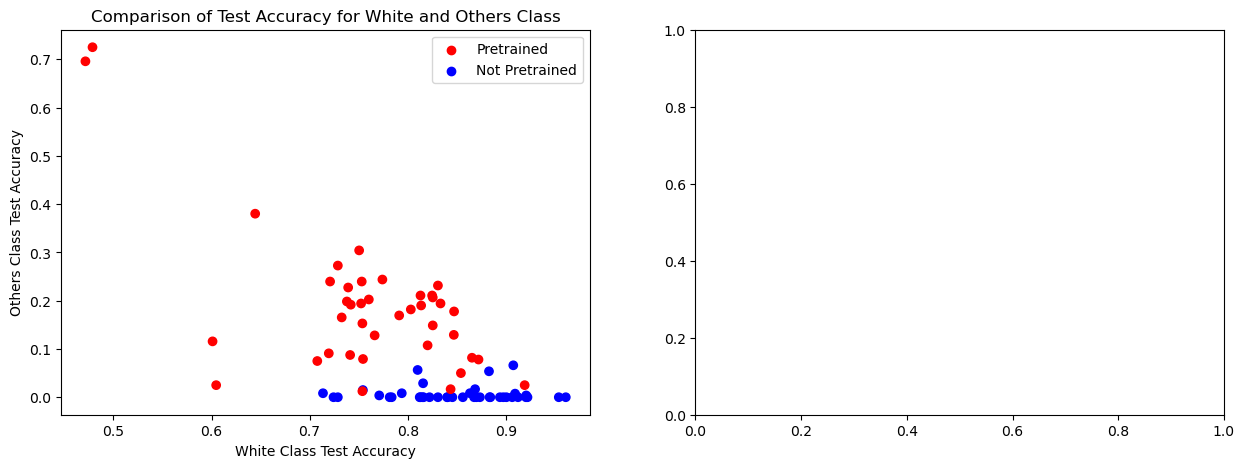

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plots
ax[0].scatter(x=df.White, y=df.Others, c=['r' if i else 'b' for i in df.pretrained])
# ax[1].scatter(x=df.Others, y=df.test_acc, c=['r' if i else 'b' for i in df.pretrained])

# Dummy scatter points for the legend
ax[0].scatter([], [], c='r', label='Pretrained')
ax[0].scatter([], [], c='b', label='Not Pretrained')
# ax[1].scatter([], [], c='r', label='Pretrained')
# ax[1].scatter([], [], c='b', label='Not Pretrained')

# Add legends
ax[0].legend(loc='upper right')
# ax[1].legend(loc='upper right')

# Set axis labels
ax[0].set_xlabel("White Class Test Accuracy")
ax[0].set_ylabel("Others Class Test Accuracy")
# ax[1].set_xlabel("Others Feature")

# Set subtitles for each subplot
ax[0].set_title("Comparison of Test Accuracy for White and Others Class")
# ax[1].set_title("Scatter Plot for Others Feature")
plt.savefig("ViT-utk-class-comparison.png", dpi=300)
plt.show()


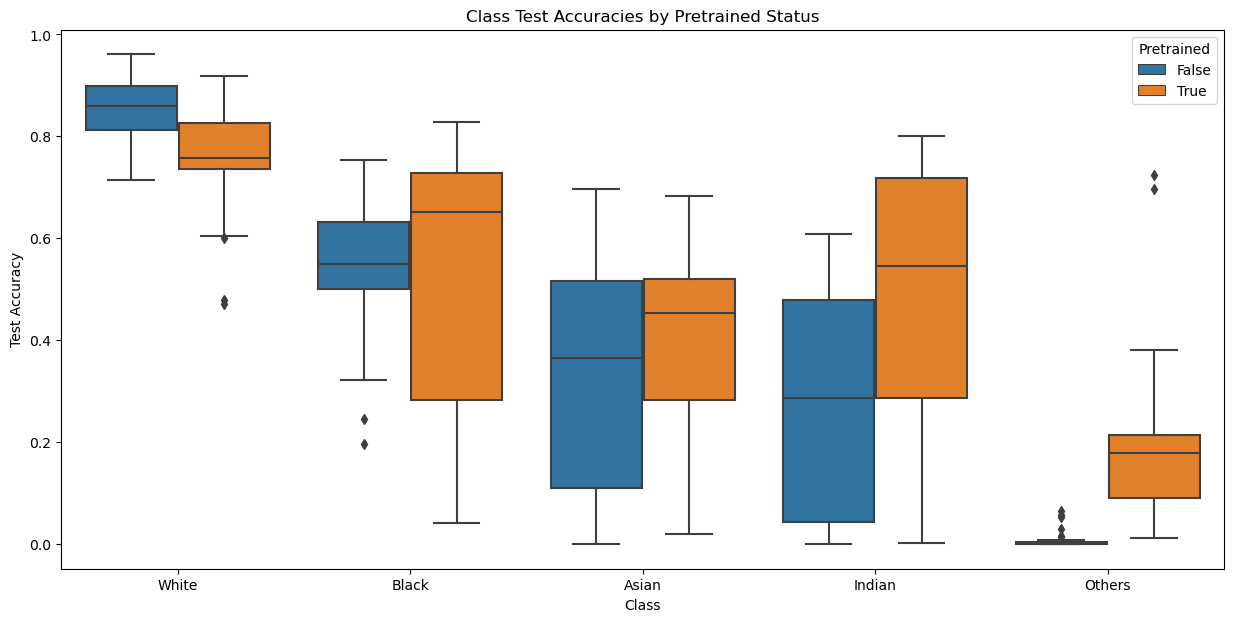

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume your dataframe `df` contains columns: White, Black, Asian, Indian, Others, pretrained

# Melt the dataframe for easier boxplot creation
df_melted = df.melt(id_vars='pretrained', value_vars=['White', 'Black', 'Asian', 'Indian', 'Others'], 
                    var_name='Group', value_name='Accuracy')

# Create the boxplot with seaborn
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_melted, x='Group', y='Accuracy', hue='pretrained')
plt.title('Class Test Accuracies by Pretrained Status')
plt.xlabel('Class')
plt.ylabel('Test Accuracy')
plt.legend(title='Pretrained')
plt.savefig("ViT-utk-class-comparison.png", dpi=300)
plt.show()


In [16]:
df[df.test_acc<40]

,model,train_loss,valid_loss,test_loss,train_acc,valid_acc,test_acc,White,Black,Asian,Indian,Others,pretrained,filename,learning_rate,n_epoch,weight_decay,batch_size,drop_out
37,vit_b_16,1.306367,1.568791,1.565747,0.478036,0.294994,31.652228,0.471438,0.040996,0.263672,0.133556,0.695833,True,vit_b_16_5,0.002,10,0.0001,128,0.3
38,vit_b_16,1.299987,1.526453,1.526566,0.481832,0.306524,31.367685,0.478661,0.089312,0.087891,0.180301,0.725000,True,vit_b_16_7,0.002,25,0.0001,128,0.3
35,vit_b_32,1.378273,1.540779,1.537752,0.450738,0.359111,35.080556,0.707813,0.122987,0.056641,0.066778,0.075000,True,vit_b_32_5,0.002,10,0.0001,128,0.3
29,vit_b_32,1.359453,1.542130,1.542873,0.455318,0.367548,36.946384,0.753775,0.222548,0.019531,0.001669,0.012500,True,vit_b_32_7,0.002,25,0.0001,128,0.3


In [17]:
df.sort_values(by='Others', ascending=False)

,model,train_loss,valid_loss,test_loss,train_acc,valid_acc,test_acc,White,Black,Asian,Indian,Others,pretrained,filename,learning_rate,n_epoch,weight_decay,batch_size,drop_out
38,vit_b_16,1.299987,1.526453,1.526566,0.481832,0.306524,31.367685,0.478661,0.089312,0.087891,0.180301,0.725000,True,vit_b_16_7,0.002,25,0.00010,128,0.3
37,vit_b_16,1.306367,1.568791,1.565747,0.478036,0.294994,31.652228,0.471438,0.040996,0.263672,0.133556,0.695833,True,vit_b_16_5,0.002,10,0.00010,128,0.3
24,vit_l_32,1.138372,1.128977,1.179123,0.564206,0.561024,53.963159,0.644503,0.490991,0.331407,0.569558,0.380165,True,vit_l_32_7,0.002,25,0.00010,128,0.3
31,vit_b_32,1.272060,1.394189,1.394439,0.497801,0.443757,44.779327,0.750492,0.288433,0.152344,0.173623,0.304167,True,vit_b_32_1,0.002,25,0.00010,128,0.2
16,vit_l_32,0.919324,0.918167,0.978483,0.660199,0.654106,62.990353,0.728769,0.566066,0.406551,0.785597,0.272727,True,vit_l_32_2,0.001,10,0.00010,128,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,vit_l_32,1.356234,1.365189,1.357164,0.463634,0.445444,45.666659,0.954031,0.246334,0.052632,0.000000,0.000000,False,vit_l_32_3,0.002,10,0.00001,128,0.2
16,vit_l_32,1.158686,1.172793,1.167946,0.554504,0.561305,55.181445,0.816123,0.590909,0.378543,0.234177,0.000000,False,vit_l_32_4,0.003,10,0.00010,128,0.2
20,vit_l_32,1.081436,1.154560,1.128134,0.589937,0.583240,58.886857,0.869993,0.483163,0.445312,0.353923,0.000000,False,vit_l_32_5,0.002,10,0.00010,128,0.3
18,vit_l_32,1.235689,1.170365,1.196208,0.522688,0.562711,53.587175,0.728769,0.603604,0.510597,0.219313,0.000000,False,vit_l_32_6,0.005,10,0.00010,128,0.2


In [18]:
time_df.train_time.dtype

dtype('O')

In [19]:
time_df['train_time_minutes'] = time_df['train_time'].apply(
    lambda x: pd.to_timedelta(x).total_seconds() / 60
)
time_df.pivot(index='model', columns=['pretrained','epochs'], values=['train_time_minutes'])

train_time_minutes                                  
pretrained                 True       False      True        False
epochs                        10         10         25          25
model                                                             
vit_b_16_a100          10.137365  23.270532  23.567324   53.176457
vit_b_32_a100           3.274428   6.805755   8.003272   15.885601
vit_l_16_a100          33.368564  77.772332  76.584131  188.990953
vit_l_32_a100           9.312433  21.354255  21.739334   48.163605

In [20]:
time_df.pivot(index='model', columns=['pretrained','epochs'], values=['train_time'])

train_time                                                
pretrained              True            False           True            False
epochs                     10              10              25              25
model                                                                        
vit_b_16_a100  0:10:08.241926  0:23:16.231898  0:23:34.039437  0:53:10.587415
vit_b_32_a100  0:03:16.465709  0:06:48.345300  0:08:00.196348  0:15:53.136059
vit_l_16_a100  0:33:22.113849  1:17:46.339911  1:16:35.047850  3:08:59.457171
vit_l_32_a100  0:09:18.745975  0:21:21.255270  0:21:44.360052  0:48:09.816320

In [21]:
time_samples['train_time'] = pd.to_timedelta(time_samples['train_time']).dt.total_seconds() / 60
time_samples['inference_time'] = pd.to_timedelta(time_samples['inference_time']).dt.total_seconds() / 60
time_samples.groupby(['model','pretrained','n_epoch']).agg(['mean','std'])

train_time            inference_time          
                                   mean        std           mean       std
model    pretrained n_epoch                                                
vit_b_16 False      10        42.100912  11.139631       0.280556  0.071051
                    25        86.208703  27.496475       0.259850  0.062034
         True       10        28.274928  14.493388       0.460032  0.227624
                    25        82.705739  38.855074       0.531268  0.244462
vit_b_32 False      10        19.196667   8.139439       0.172822  0.073499
                    25        58.591466  18.051324       0.207887  0.071360
         True       10        11.358160   3.345113       0.218064  0.049884
                    25        27.706837   9.322821       0.203566  0.068396
vit_l_16 False      10        74.134470   3.582504       0.541299  0.115669
                    25       182.129535   7.912200       0.499184  0.034502
         True       10        32.867798  12.473050       0.543223  0.186409
                    25       113.257406  16.823703       0.742955  0.065606
vit_l_32 False      10        34.500802   8.592296       0.239866  0.056932
                    25        81.712729  11.903476       0.236327  0.031676
         True       10        10.933747   1.551653       0.204126  0.025621
                    25        26.107207   4.374890       0.187500  0.033957

In [22]:
df[(df.model=='vit_b_16') & (df.pretrained==True)].sort_values(by='test_acc', ascending=False)

,model,train_loss,valid_loss,test_loss,train_acc,valid_acc,test_acc,White,Black,Asian,Indian,Others,pretrained,filename,learning_rate,n_epoch,weight_decay,batch_size,drop_out
39,vit_b_16,1.090035,0.939825,0.946380,0.586321,0.656637,65.146250,0.847012,0.661786,0.468750,0.509182,0.129167,True,vit_b_16_8,0.001,25,0.00010,128,0.2
23,vit_b_16,1.085985,0.947614,0.988987,0.585839,0.660855,63.689832,0.847268,0.650150,0.464355,0.427169,0.177686,True,vit_b_16_9,0.002,25,0.00001,128,0.2
0,vit_b_16,1.110840,0.962122,0.967317,0.581380,0.645388,63.551980,0.865513,0.674041,0.388258,0.481034,0.081784,True,vit_b_16_0,0.002,10,0.00010,128,0.2
1,vit_b_16,1.097085,0.966012,0.970613,0.580295,0.644263,63.444241,0.872170,0.617994,0.454545,0.460345,0.078067,True,vit_b_16_1,0.002,25,0.00010,128,0.2
6,vit_b_16,1.112056,0.965262,1.002098,0.576198,0.646794,63.319649,0.791310,0.708709,0.418112,0.523732,0.169422,True,vit_b_16_3,0.002,10,0.00001,128,0.2
7,vit_b_16,1.093714,0.956348,0.997261,0.580476,0.652981,62.705810,0.825543,0.660661,0.447014,0.438625,0.148760,True,vit_b_16_2,0.001,10,0.00010,128,0.2
3,vit_b_16,1.101906,0.970675,1.014731,0.581259,0.638639,61.896658,0.774193,0.647147,0.502890,0.448445,0.243802,True,vit_b_16_6,0.005,10,0.00010,128,0.2
36,vit_b_16,1.131619,1.016293,1.029637,0.566014,0.616142,61.076180,0.919238,0.612006,0.339844,0.293823,0.025000,True,vit_b_16_4,0.003,10,0.00010,128,0.2
37,vit_b_16,1.306367,1.568791,1.565747,0.478036,0.294994,31.652228,0.471438,0.040996,0.263672,0.133556,0.695833,True,vit_b_16_5,0.002,10,0.00010,128,0.3
38,vit_b_16,1.299987,1.526453,1.526566,0.481832,0.306524,31.367685,0.478661,0.089312,0.087891,0.180301,0.725000,True,vit_b_16_7,0.002,25,0.00010,128,0.3


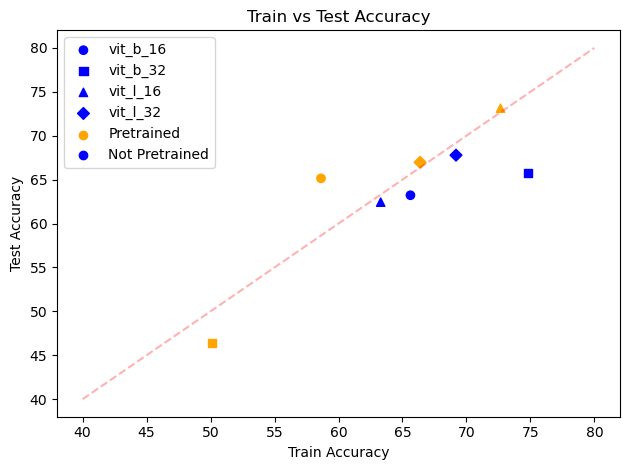

In [23]:
temp = subset.reset_index()

# Define marker styles for each model type
marker_map = {
    'vit_b_16': 'o',  # Circle
    'vit_b_32': 's',  # Square
    'vit_l_16': '^',  # Triangle
    'vit_l_32': 'D'   # Diamond
}

# Create the scatter plot
# plt.figure(figsize=(8, 6))
for model_type, marker in marker_map.items():
    new = temp[temp.model == model_type]
    plt.scatter(
        x=new.train_acc * 100,
        y=new.test_acc,
        c=new.pretrained.map({True: 'orange', False: 'b'}).to_list(),
        marker=marker,
        label=model_type  # Add model type to the legend
    )

# Add dummy points for Pretrained and Not Pretrained in the legend
plt.scatter([], [], c='orange', marker='o', label='Pretrained')
plt.scatter([], [], c='b', marker='o', label='Not Pretrained')

# Plot the y=x line
plt.plot([40, 80], [40, 80], 'r--', alpha=0.3)

# Add labels, title, and legend
plt.xlabel('Train Accuracy')
plt.ylabel('Test Accuracy')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.tight_layout()

plt.savefig("ViT-utk-train-vs-test.png", dpi=300)
plt.show()
